## Plotting HEF MB and saving dataframe

  hydrological year  calender year mean specific mass balance  \
0               NaN            NaN                      kg/m²   
1         1952/1953         1953.0                       -540   
2         1953/1954         1954.0                       -286   
3         1954/1955         1955.0                         76   
4         1955/1956         1956.0                       -275   
5         1956/1957         1957.0                       -189   
6         1957/1958         1958.0                       -981   
7         1958/1959         1959.0                       -763   
8         1959/1960         1960.0                        -62   
9         1960/1961         1961.0                       -205   

  climatic mass balance winter mass balance winter mass balance B06  \
0                 kg/m²               kg/m²                   kg/m²   
1                   NaN                 NaN                     NaN   
2                   NaN                 NaN                     NaN   


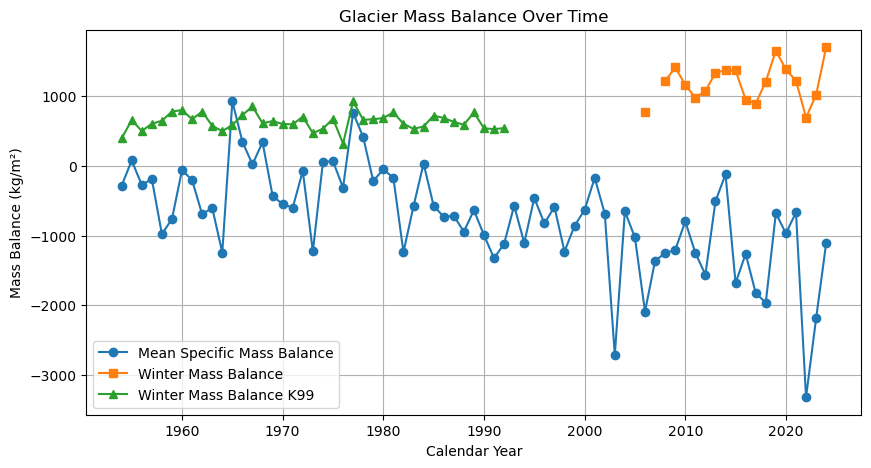

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "HEF_mb_4Taren.xlsx"  # Change this to your actual file path
df = pd.read_excel(file_path, sheet_name=0)  # Adjust sheet_name if needed

# Inspect the first few rows to find where the actual data starts
print(df.head(10))  # Helps identify if there's junk data at the top

# Drop irrelevant rows manually if needed (adjust based on your file)
df = df.iloc[2:].reset_index(drop=True)  # Example: Skip first 2 rows

# Rename columns if headers are messy
df.columns = ["hydrological year", "calendar_year", "mean specific mass balance",
              "climatic mass balance", "winter mass balance", "winter mass balance B06",
              "comment B06", "winter mass balance K99"]

# Convert "calender year" to numeric, forcing errors to NaN
df["calendar_year"] = pd.to_numeric(df["calendar_year"], errors="coerce").astype("Int64")


# Drop rows where "calender year" is NaN (helps remove non-data rows)
df = df.dropna(subset=["calendar_year"])

# Convert all mass balance columns to numeric
for col in ["mean specific mass balance", "winter mass balance", "winter mass balance K99"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")



df.to_pickle("hef_MB.pkl")

# Plot the mass balance data
plt.figure(figsize=(10, 5))
plt.plot(df["calendar_year"], df["mean specific mass balance"], marker="o", label="Mean Specific Mass Balance")
plt.plot(df["calendar_year"], df["winter mass balance"], marker="s", label="Winter Mass Balance")
plt.plot(df["calendar_year"], df["winter mass balance K99"], marker="^", label="Winter Mass Balance K99")

# Formatting the plot
plt.xlabel("Calendar Year")
plt.ylabel("Mass Balance (kg/m²)")
plt.title("Glacier Mass Balance Over Time")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


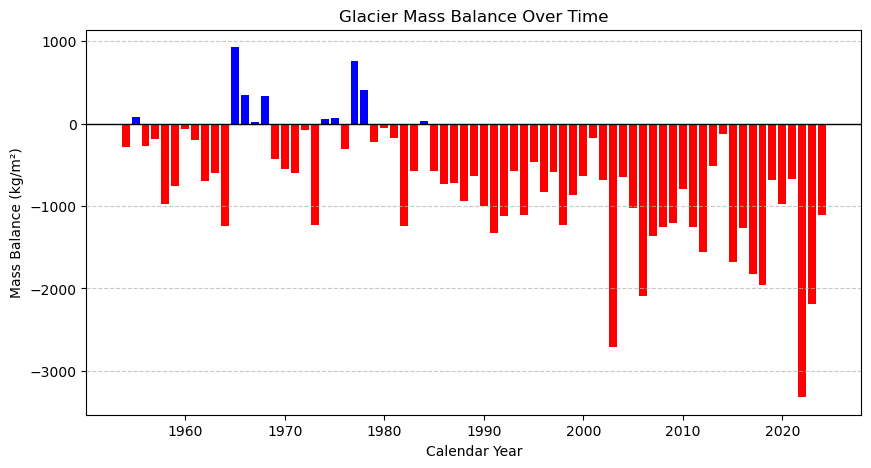

In [8]:

# Plot bar chart
plt.figure(figsize=(10, 5))
colors = ["red" if x < 0 else "blue" for x in df["mean specific mass balance"]]
plt.bar(df["calendar year"], df["mean specific mass balance"], color=colors)

# Formatting
plt.xlabel("Calendar Year")
plt.ylabel("Mass Balance (kg/m²)")
plt.title("Glacier Mass Balance Over Time")
plt.axhline(0, color="black", linewidth=1)  # Zero line
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


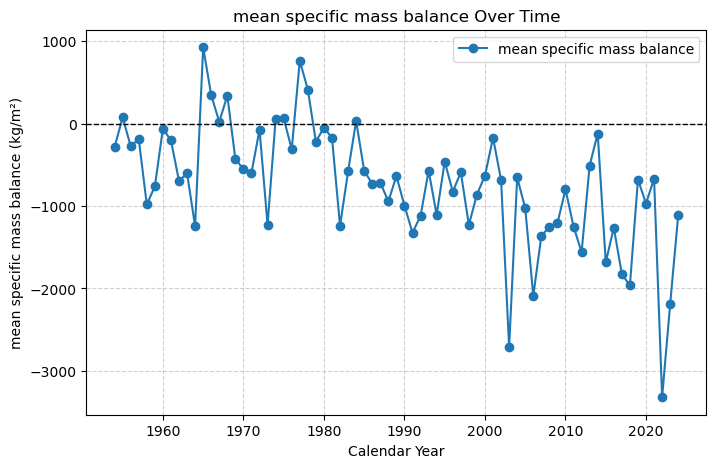

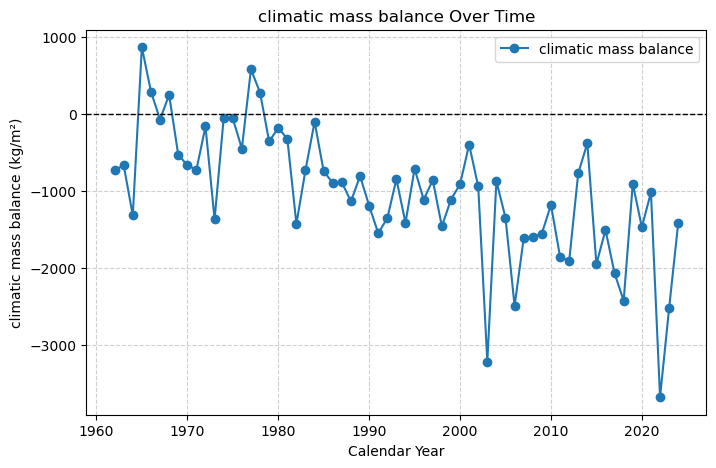

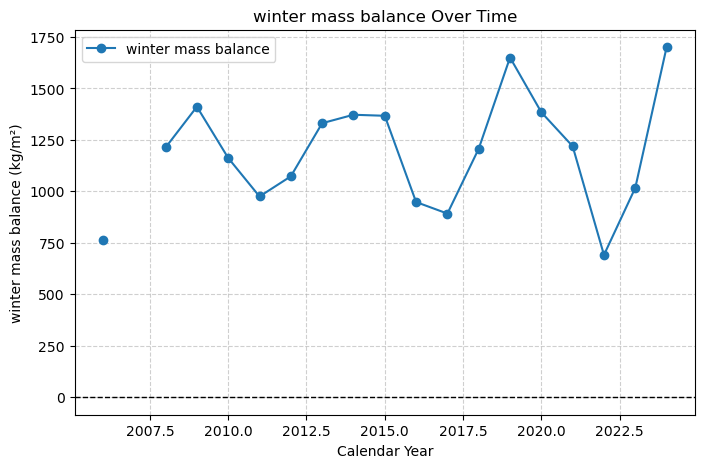

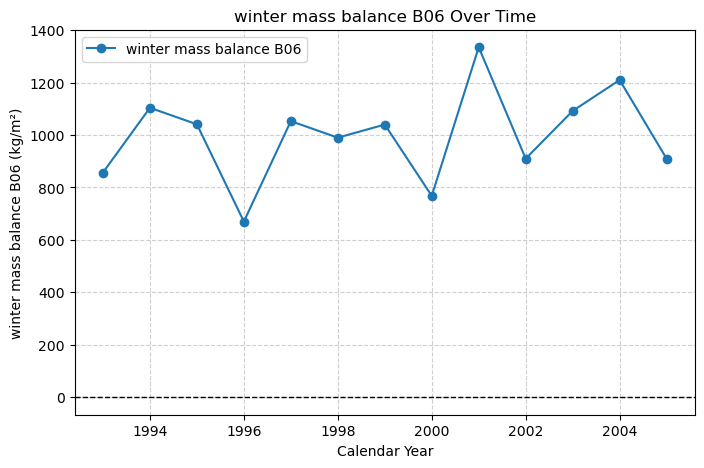

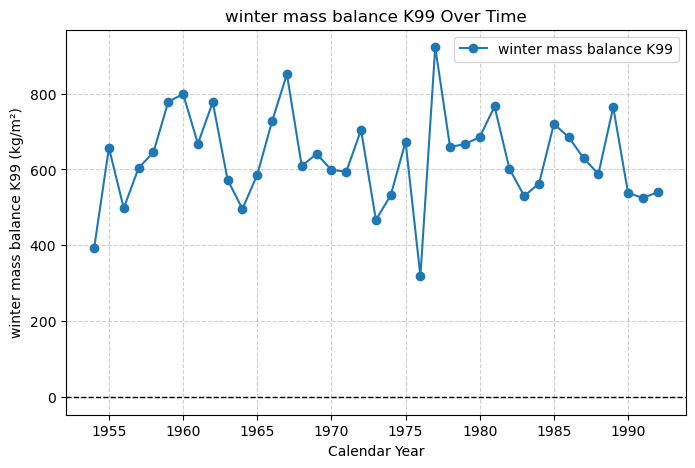

In [12]:
# Convert mass balance variables to numeric
variables_to_plot = [
    "mean specific mass balance",
    "climatic mass balance",
    "winter mass balance",
    "winter mass balance B06",
    "winter mass balance K99"
]

for var in variables_to_plot:
    df[var] = pd.to_numeric(df[var], errors="coerce")

# Drop NaN values
df = df.dropna(subset=["calendar year"])

# 📌 Create individual plots for each variable
for var in variables_to_plot:
    plt.figure(figsize=(8, 5))
    plt.plot(df["calendar year"], df[var], marker="o", linestyle="-", label=var)
    
    plt.xlabel("Calendar Year")
    plt.ylabel(f"{var} (kg/m²)")
    plt.title(f"{var} Over Time")
    plt.axhline(0, color="black", linewidth=1, linestyle="--")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.show()  # Show each plot separately

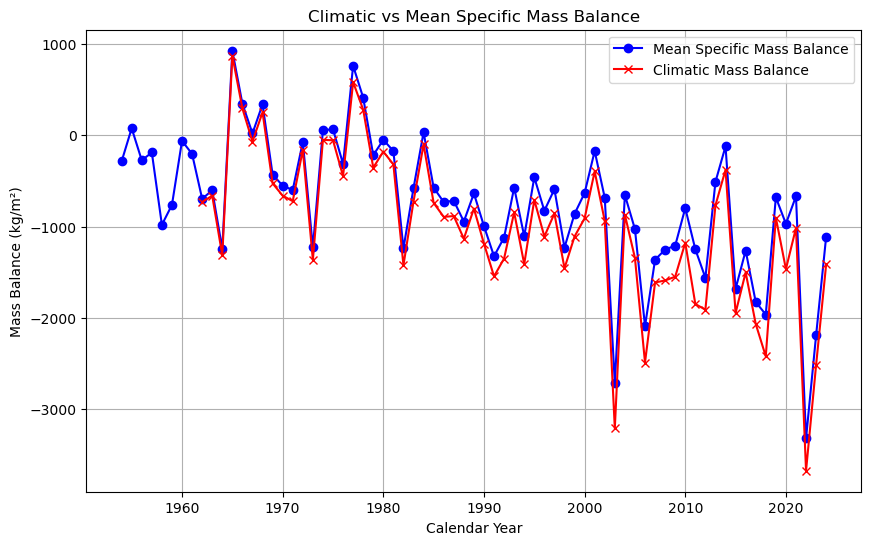

In [15]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['calendar year'], df['mean specific mass balance'], label='Mean Specific Mass Balance', color='blue', linestyle='-', marker='o')
plt.plot(df['calendar year'], df['climatic mass balance'], label='Climatic Mass Balance', color='red', linestyle='-', marker='x')

# Adding titles and labels
plt.title('Climatic vs Mean Specific Mass Balance')
plt.xlabel('Calendar Year')
plt.ylabel('Mass Balance (kg/m²)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

## Could I aggregate this / smooth this so that a nicer signal comes out?
Like that online summary... 

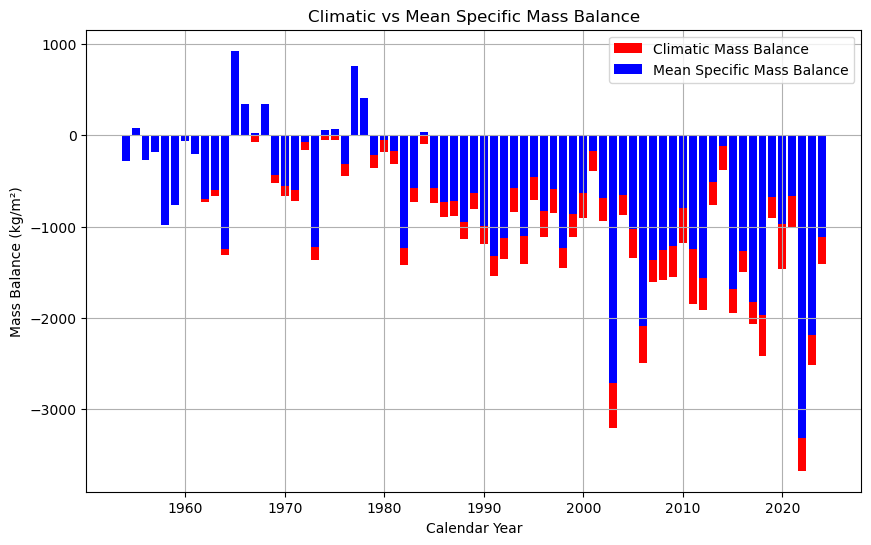

In [18]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df['calendar year'], df['climatic mass balance'], label='Climatic Mass Balance', color='red')
plt.bar(df['calendar year'], df['mean specific mass balance'], label='Mean Specific Mass Balance', color='blue')

# Adding titles and labels
plt.title('Climatic vs Mean Specific Mass Balance')
plt.xlabel('Calendar Year')
plt.ylabel('Mass Balance (kg/m²)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

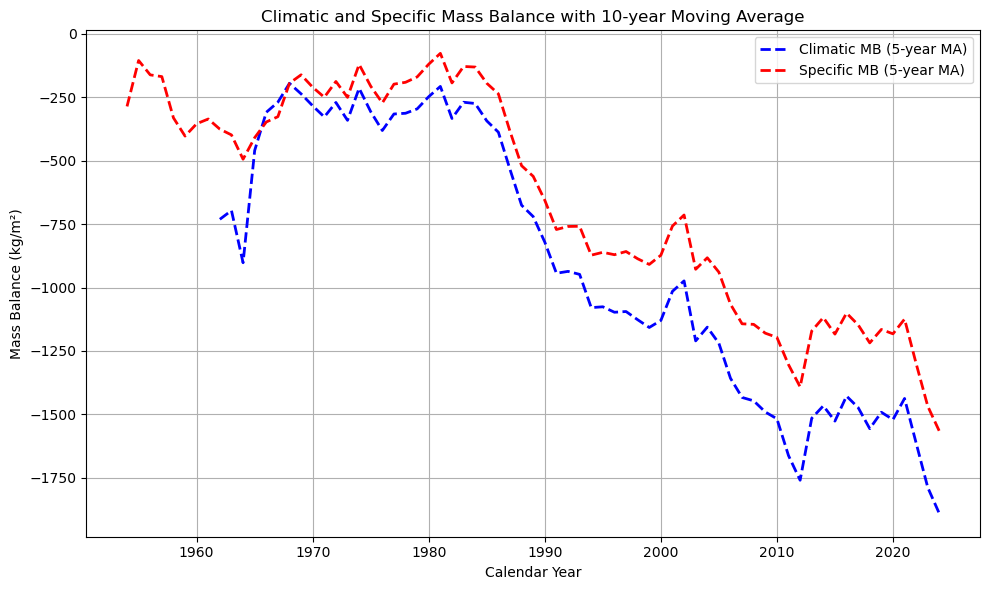

In [24]:
window_size = 10

# Calculate the 5-year moving average for both climatic mass balance and mean specific mass balance
df['climatic mass balance (5-year MA)'] = df['climatic mass balance'].rolling(window=window_size, min_periods=1).mean()
df['mean specific mass balance (5-year MA)'] = df['mean specific mass balance'].rolling(window=window_size, min_periods=1).mean()

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot 5-year moving averages
plt.plot(df['calendar year'], df['climatic mass balance (5-year MA)'], label='Climatic MB (5-year MA)', color='blue', linestyle='--', linewidth=2)
plt.plot(df['calendar year'], df['mean specific mass balance (5-year MA)'], label='Specific MB (5-year MA)', color='red', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Calendar Year')
plt.ylabel('Mass Balance (kg/m²)')
plt.title('Climatic and Specific Mass Balance with 10-year Moving Average')
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Making a moving average signal to smooth it a bit.
Maybe not a good idea if we are looking at years of rain etc.
I might not use this.